## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

#fill the imports

In [ ]:
#--ipyccel/--pyccel

In [ ]:
!pip install pyccel==1.1.0

     |████████████████████████████████| 256kB 5.3MB/s 
     |████████████████████████████████| 81kB 3.6MB/s 
     |████████████████████████████████| 61kB 3.9MB/s 


In [ ]:
!pyccel --version

pyccel 1.1.0 from /usr/local/lib/python3.7/dist-packages/pyccel (python 3.7)


## Pure python function

In [ ]:
def solve_1d_linearconv_pure(u, un, nt, nx, dt, dx, c):

    for n in range(nt):
        for i in range(nx):
            un[i]=u[i]
        for i in range(1,nx):
            u[i]=un[i]-c*dt/dx*(un[i]-un[i-1])
    return 0
"""quand je fais le v=u si change u le v va changer c pour ca en python 
on fait v=u.copy mais ça ave les calculs ça consomme 
c pour ca on fait soit une boucle for 
ou vectorisation ou le slicing :
u[:]=v[:]
"""

'quand je fais le v=u si change u le v va changer c pour ca en python \non fait v=u.copy mais ça ave les calculs ça consomme \nc pour ca on fait soit une boucle for \nou vectorisation ou le slicing :\nu[:]=v[:]\n'

## Numba accelerator

In [ ]:
@njit(fastmath=True)
def solve_1d_linearconv_numba(u, un, nt, nx, dt, dx, c):

    for n in range(nt):
        for i in range(nx):
            un[i]=u[i]
        for i in range(1,nx):
            u[i]=un[i]-c*dt/dx*(un[i]-un[i-1])
    #fill the update of u
    return 0

## Pyccel accelerator

In [ ]:
@types('float[:]', 'float[:]','int', 'int', 'float', 'float','int')
def solve_1d_linearconv_pyccel(u, un, nt, nx, dt, dx, c):
    for n in range(nt):
        for i in range(nx):
            un[i]=u[i]
        for i in range(1,nx):
            u[i]=un[i]-c*dt/dx*(un[i]-un[i-1])    
    #fill the update of u
    return 0

## Inputs

Text(0.5, 1.0, '1D Linear Convection')

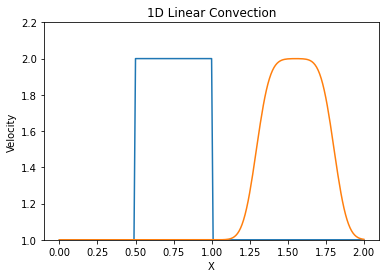

In [ ]:
nx = 201  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2 / (nx-1)
nt = 200    #nt is the number of timesteps we want to calculate
c = 1      #assume wavespeed of c = 1
dt = 0.004
grid = np.linspace(0,2,nx) # creating the space grid    

u0 = np.ones(nx)      #numpy function ones()
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0)
u = u0.copy()
un = np.ones(nx)
solve_1d_linearconv_pyccel(u, un, nt, nx, dt, dx, c)
#solve_1d_linearconv_pure(u, un, nt, nx, dt, dx, c)
#Plotting data
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection')

## Call Funtions

### Pure function

In [ ]:
%timeit solve_1d_linearconv_pure(u, un, nt, nx, dt, dx, c)

10 loops, best of 5: 45.7 ms per loop


### Function with numba accelerator

In [ ]:
%timeit solve_1d_linearconv_numba(u, un, nt, nx, dt, dx, c)

The slowest run took 48808.44 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 13.4 µs per loop


### Function with pyccel accelerator

In [ ]:
solve_1d_linearconv_f90 = epyccel(solve_1d_linearconv_pyccel)

In [ ]:
solve_1d_linearconv_f91 = epyccel(solve_1d_linearconv_pyccel,language='c')

In [ ]:
%timeit solve_1d_linearconv_f90(u, un, nt, nx, dt, dx, c)

10000 loops, best of 5: 64.2 µs per loop


In [ ]:
solve_1d_linearconv_f91 = epyccel(solve_1d_linearconv_pyccel)